# Linear regression


Let's download the necessary libraries

In [13]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

Let's generate artificial data.

In [14]:
def generate_data(n_points=20):
  """
   Receives n_points points as input
     Returns training and test data
  """
  X = np.linspace(-5, 5, n_points)
  y = 10 * X - 7

  X_train = X[0::2].reshape(-1, 1)
  y_train = y[0::2] + np.random.randn(int(n_points/2)) * 10

  X_test = X[1::2].reshape(-1, 1)
  y_test = y[1::2] + np.random.randn(int(n_points/2)) * 10

  print(f'Generated {len(X_train)} train samples and {len(X_test)} test samples')
  return X, y, X_train, y_train, X_test, y_test

In [15]:
X, y, X_train, y_train, X_test, y_test = generate_data(100)

Generated 50 train samples and 50 test samples


Let's visualize the data using the matplotlib library.

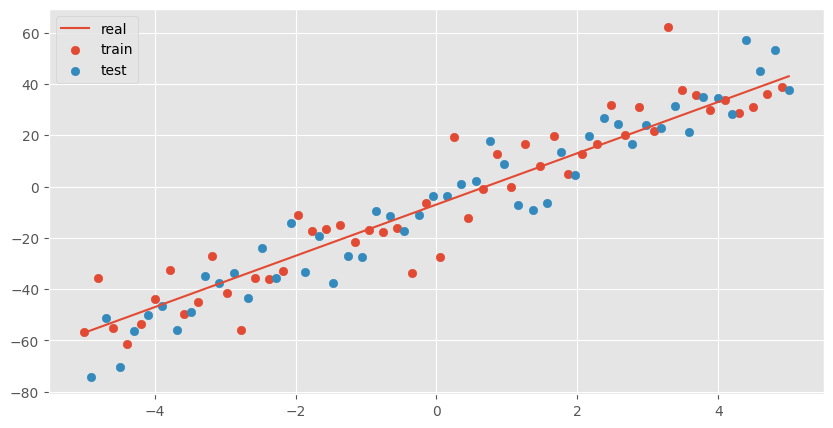

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(X, y, label='real')
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.legend(loc='best')
plt.show()

Let's work with the simplest one-dimensional case of regression. Let's train our model on the training set and predict the values on the test sample.
We will save the predicted answers into a variable $\textbf{predictions}$, and store the model weights in variables $\textbf{w}$, $b$.

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model = LinearRegression()

model.fit(X_train, y_train) # model training

w = model.coef_
b = model.intercept_

In [19]:
w, b

(array([10.31025372]), np.float64(-6.031476069725407))

Let's visualize the predictions.

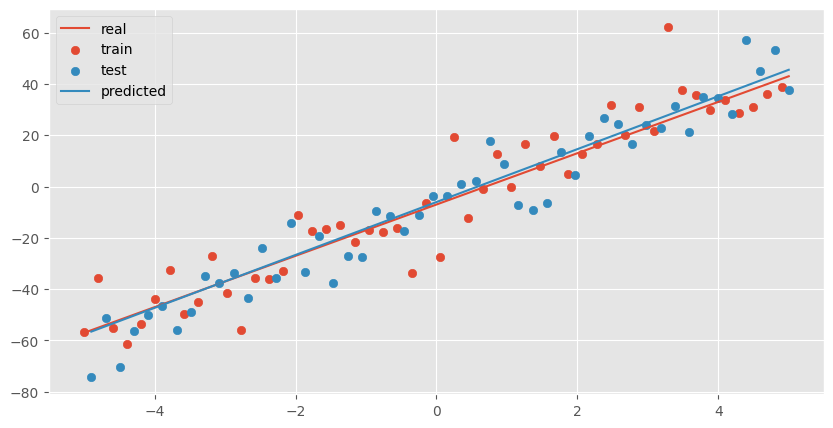

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(X, y, label='real')
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X[1::2], X[1::2].reshape(-1, 1).dot(w) + b, label='predicted')
plt.legend()
plt.show()

## Evaluation of results

Let's calculate the root mean square error on the train and on the test. We also calculate the mean absolute error.

In [106]:
from sklearn.metrics import mean_squared_error

y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

print('Train MSE: ', mean_squared_error(y_train, y_train_predicted))
print('Test MSE: ', mean_squared_error(y_test, y_test_predicted))

Train MSE:  112.27828122680896
Test MSE:  76.2717327262202


In [107]:
from sklearn.metrics import mean_absolute_error

print('Train MAE: ', mean_absolute_error(y_train, y_train_predicted))
print('Test MAE: ', mean_absolute_error(y_test, y_test_predicted))

Train MAE:  7.925713434005859
Test MAE:  6.955837112388192


# Predicting response to a marketing campaign

Let's take a dataset containing information about clients and the marketing campaign of a certain bank. Our task is to predict the success of the campaign for each client. The features are different characteristics of the client and the campaign.

Which features would you use?

http://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [117]:
# read the data
data = pd.read_csv('D:\\VsCodeDownLoad\\workspace\\bank+marketing\\bank\\bank.csv', sep=';')

In [118]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


Are the classes balanced? Pay attention to the features, build a correlation matrix, select the features

In [120]:
# your code
# Let's look at the main statistical indicators(summary statistics)
# using the method .describe()
data.describe().round(2)
print(data.dtypes)
data = pd.get_dummies(data,columns=['job','marital','education','default','housing','loan','contact','month','poutcome']) 
data = data.drop(columns=['y'])
corr_matrix = data.corr().round(2)
corr_matrix


age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
age,1.00,0.08,-0.02,-0.00,-0.01,-0.01,-0.00,-0.05,-0.05,0.02,...,0.03,0.06,-0.12,0.03,0.08,-0.02,0.01,-0.03,0.05,-0.02
balance,0.08,1.00,-0.01,-0.02,-0.01,0.01,0.03,-0.02,-0.06,0.01,...,0.06,0.02,-0.07,0.12,0.06,0.01,0.03,0.00,0.03,-0.03
day,-0.02,-0.01,1.00,-0.02,0.16,-0.09,-0.06,0.02,-0.03,-0.02,...,-0.22,-0.02,-0.03,0.10,0.04,-0.04,-0.06,-0.02,-0.03,0.08
duration,-0.00,-0.02,-0.02,1.00,-0.07,0.01,0.02,-0.04,0.03,0.02,...,-0.02,-0.03,0.01,0.01,0.00,-0.02,-0.01,0.01,0.05,-0.02
campaign,-0.01,-0.01,0.16,-0.07,1.00,-0.09,-0.07,-0.02,0.01,-0.01,...,0.04,-0.00,-0.08,-0.08,-0.06,-0.04,-0.09,-0.03,-0.06,0.12
pdays,-0.01,0.01,-0.09,0.01,-0.09,1.00,0.58,0.04,0.01,-0.01,...,-0.11,0.01,0.09,0.01,0.06,0.05,0.71,0.38,0.21,-0.87
previous,-0.00,0.03,-0.06,0.02,-0.07,0.58,1.00,0.02,-0.01,-0.01,...,-0.08,0.02,0.03,0.06,0.09,0.06,0.48,0.36,0.25,-0.68
job_admin.,-0.05,-0.02,0.02,-0.04,-0.02,0.04,0.02,1.00,-0.18,-0.07,...,-0.02,0.02,0.01,0.00,0.03,0.00,0.02,0.02,0.04,-0.04
job_blue-collar,-0.05,-0.06,-0.03,0.03,0.01,0.01,-0.01,-0.18,1.00,-0.10,...,0.02,-0.03,0.17,-0.06,-0.04,-0.02,-0.00,-0.01,-0.04,0.03
job_entrepreneur,0.02,0.01,-0.02,0.02,-0.01,-0.01,-0.01,-0.07,-0.10,1.00,...,-0.02,-0.02,0.00,0.07,-0.02,0.00,-0.01,-0.00,-0.03,0.02


Let's split the sample into train and test

KeyError: "['target'] not found in axis"

Let's train linear regression

In [ ]:
# your code

Finally, let's calculate the metrics

In [ ]:
# your code